In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
batch_size = 32

width = 128
height = 128
epochs = 40
NUM_TRAIN = 2000
NUM_TEST = 1000
dropout_rate = 0.2
input_shape = (height, width, 1)

'download (11).jpg'  'images (24).jpg'	'images (42).jpg'  'images (60).jpg'
'download (12).jpg'  'images (25).jpg'	'images (43).jpg'  'images (61).jpg'
'download (13).jpg'  'images (26).jpg'	'images (44).jpg'  'images (62).jpg'
'download (5).jpg'   'images (27).jpg'	'images (45).jpg'  'images (63).jpg'
 download.jpg	     'images (28).jpg'	'images (46).jpg'  'images (64).jpg'
'images (10).jpg'    'images (29).jpg'	'images (47).jpg'  'images (65).jpg'
'images (11).jpg'    'images (2).jpg'	'images (48).jpg'  'images (66).jpg'
'images (12).jpg'    'images (30).jpg'	'images (49).jpg'  'images (67).jpg'
'images (13).jpg'    'images (31).jpg'	'images (4).jpg'   'images (68).jpg'
'images (14).jpg'    'images (32).jpg'	'images (50).jpg'  'images (69).jpg'
'images (15).jpg'    'images (33).jpg'	'images (51).jpg'  'images (6).jpg'
'images (16).jpg'    'images (34).jpg'	'images (52).jpg'  'images (70).jpg'
'images (17).jpg'    'images (35).jpg'	'images (53).jpg'  'images (71).jpg'
'images (18).jpg

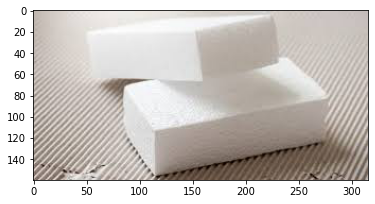

In [ ]:
import cv2
from matplotlib import pyplot as plt
!sudo ls "/content/drive/My Drive/training data/0"
%cd /content/drive/My\ Drive/training\ data
img=plt.imread('0/download (11).jpg')
plt.imshow(img)
plt.show()

In [ ]:
datadir='/content/drive/My Drive/training data'
path='/content/drive/My Drive/training data'
CATEGORIES=['0','1','2','3']
imgsize=331
train=[]
train=[]
def training_data():
    for category in CATEGORIES:
        path=os.path.join(datadir,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_arr=cv2.imread(os.path.join(path,img))
            new_arr=cv2.resize(img_arr,(imgsize,imgsize))
            train.append([new_arr,class_num])
training_data()
print(len(train))

425


In [ ]:
test=[]
path='/content/drive/My Drive/testing_data'
def testing_data():
        for img in os.listdir(path):
            img_arr=cv2.imread(os.path.join(path,img))
            new_arr=cv2.resize(img_arr,(imgsize,imgsize))
            test.append(new_arr)
testing_data()
print(len(test))

34


In [ ]:
import random
random.shuffle(train)
x=[]
y=[]
for features,label in train:
    x.append(features)
    y.append(label)
x=np.array(x)
y=np.array(y)
print(x.shape)
print(len(np.unique(y)))

(425, 331, 331, 3)
4


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Activation,Flatten,BatchNormalization
x=np.array(x)
y=np.array(y)
x=x.astype('float32')/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)
x_train,x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=0.25, shuffle=True)

# New Section

In [ ]:

batch_size=64

print(x_train.shape)
print(x_valid.shape)

(238, 331, 331, 3)
(80, 331, 331, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator()
x_train=np.reshape(x_train,(238,331,331,3))
train_generator = train_datagen.flow(x_train,y_train)
x_valid=np.reshape(x_valid,(80,331,331,3))
validation_generator = test_datagen.flow(x_valid,y_valid)
        

Own model

In [ ]:
from tensorflow.keras.applications import VGG16

num_classes = 4

model = Sequential()
model.add(VGG16(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(409, activation='relu'))
#model.add(BatchNormalisation())
model.add(Dense(409, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False


58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 409)               209817    
_________________________________________________________________
dense_1 (Dense)              (None, 409)               167690    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1640      
Total params: 15,093,835
Trainable params: 379,147
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
print('This is the number of trainable layers '
      'before freezing the conv base:', len(model.trainable_weights))


This is the number of trainable layers before freezing the conv base: 6


In [ ]:
import tensorflow 
import datetime
%load_ext tensorboard

In [ ]:
rm -rf ./logs/

In [ ]:

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

from keras.callbacks import ModelCheckpoint   
checkpointer = ModelCheckpoint(filepath='transfermodel.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit_generator(
      generator=train_generator,
      validation_data=validation_generator, validation_steps=1,
      epochs=15,
      verbose=1,
      callbacks=[checkpointer,tensorboard],
      use_multiprocessing=True)




/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 14s 601ms/step - loss: 1.5175 - acc: 0.2925 - val_loss: 1.2498 - val_acc: 0.4688

Epoch 00001: val_loss improved from inf to 1.24976, saving model to transfermodel.weights.best.hdf5
Epoch 2/15
8/8 [==============================] - 10s 1s/step - loss: 1.1978 - acc: 0.4813 - val_loss: 1.0843 - val_acc: 0.5000

Epoch 00002: val_loss improved from 1.24976 to 1.08432, saving model to transfermodel.weights.best.hdf5
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 1.0478 - acc: 0.5878 - val_loss: 0.8667 - val_acc: 0.6250

Epoch 00003: val_loss improved from 1.08432 to 0.86673, saving model to transfermodel.weights.best.hdf5
Epoch 4/15
8/8 [==============================] - 10s 1s/step - loss: 0.9523 - acc: 0.6006 - val_loss: 0.7860 - val_acc: 0.7188

Epoch 00004: val_loss improved from 0.86673 to 0.78603, saving model to transfermodel.weights.best.hdf5
Epoch 5/15
8/8 [==============================] - 10s 1s/step - loss:

In [ ]:

%tensorboard --logdir logs/fit

In [ ]:
score = model.evaluate(x_test, y_test,verbose=0)
print('\n', 'Test accuracy:{0:.2f}'.format(score[1]))

!cp '/gdrive/My Drive/my_file' 'my_file'!cp '/gdrive/My Drive/my_file' 'my_file'!cp '/gdrive/My Drive/my_file' 'my_file'!cp '/gdrive/My Drive/my_file' 'my_file'!cp '/gdrive/My Drive/my_file' 'my_file'!cp '/gdrive/My Drive/my_file' 'my_file'!cp '/gdrive/My Drive/my_file' 'my_file'!cp '/gdrive/My Drive/my_file' 'my_file'!!!!!!!!!!!!!!!!!!!!!!!dc124cs1d15c1d591d!cassaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaadgrgrggrv 33ewsdaasqdwdadasasdsac1# New Section

In [ ]:
os.makedirs("./models", exist_ok=True)
model.save('./models/model01.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(arr):
    # Read the image and resize it
    #img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    #x = image.img_to_array(img)
    # Reshape
    #x = x.reshape((1,) + x.shape)
    arr=np.reshape(arr,(1,331,331,3))
    arr=arr.astype('float32')/255
    result = model.predict(arr)
    j=np.argmax(result)
    return j



                 HDPE or PVC


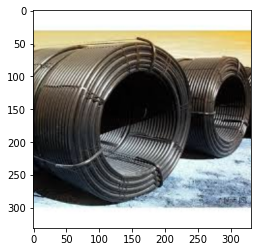

                 HDPE or PVC


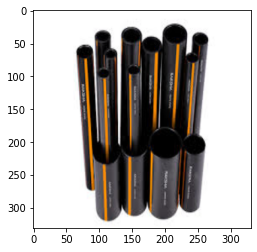

                 LDPE or HDPE or PET


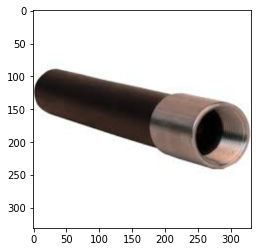

                 HDPE or PVC


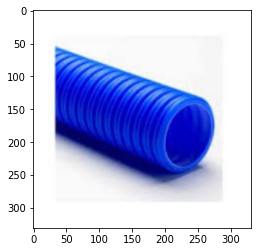

                 HDPE or PVC


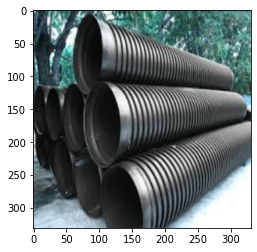

                 HDPE or PVC


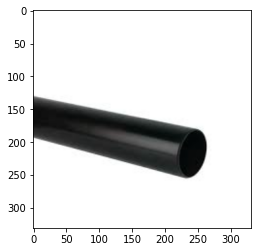

                 LDPE or PET


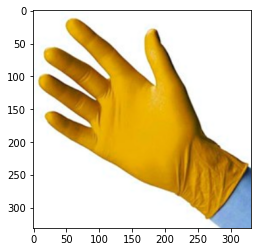

                 LDPE or HDPE or PET


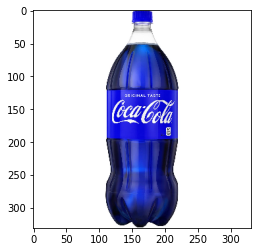

                 LDPE or HDPE or PET


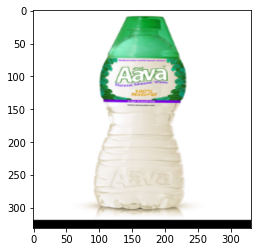

                 LDPE or HDPE or PET


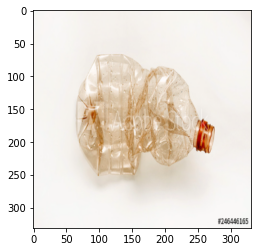

                 LDPE or PET


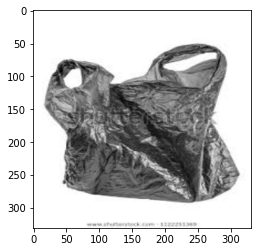

                 LDPE or PET


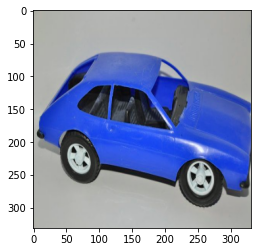

                 LDPE or PET


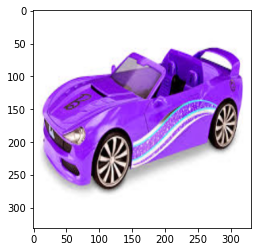

                 LDPE or PET


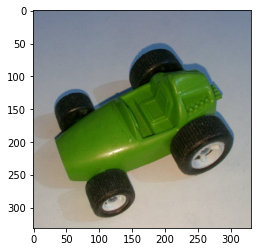

                 LDPE or PET


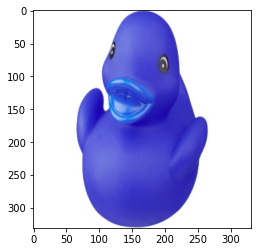

                 LDPE or PET


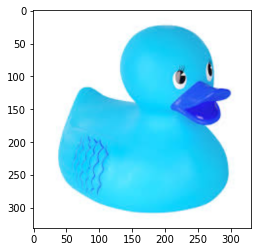

                 polystyrene


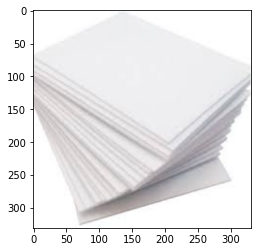

                 LDPE or HDPE or PET


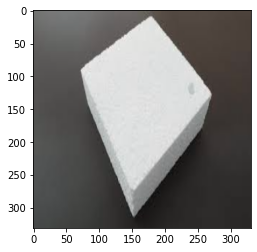

                 polystyrene


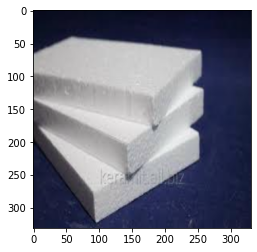

                 polystyrene


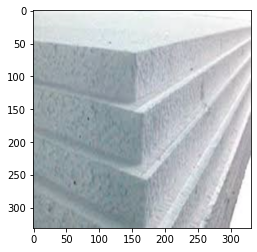

                 polystyrene


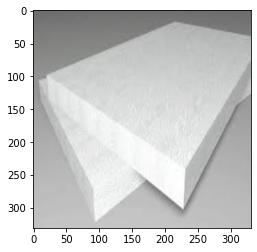

                 LDPE or HDPE or PET


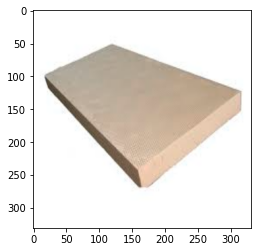

                 polystyrene


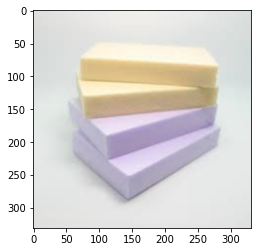

                 polystyrene


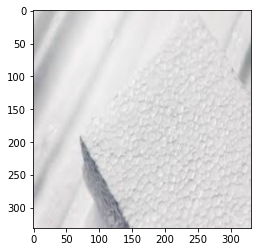

                 polystyrene


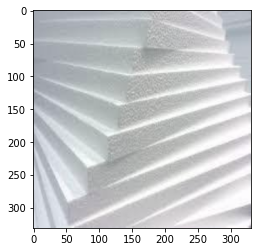

                 LDPE or PET


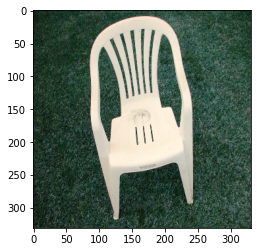

                 LDPE or HDPE or PET


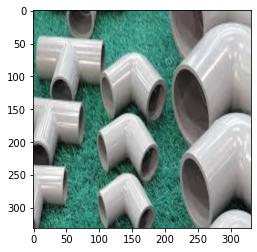

                 HDPE or PVC


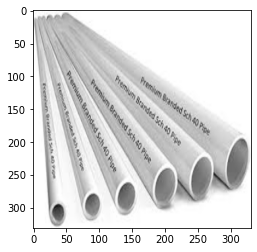

                 HDPE or PVC


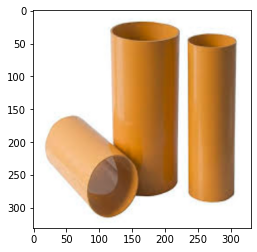

                 HDPE or PVC


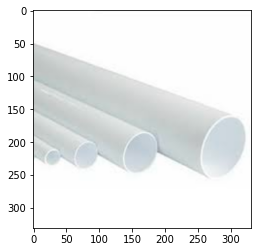

                 LDPE or HDPE or PET


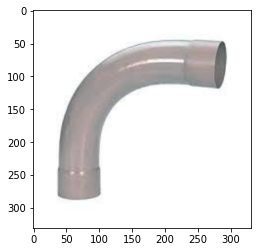

In [ ]:
from PIL import Image
temp=0


for i in range(31):
  temp=predict_image(test[i])
  if temp==0:
    text="polystyrene"
  elif temp==1:
    text="LDPE or PET"
  elif temp==2:
    text="HDPE or PVC"
  elif temp==3:
    text="LDPE or HDPE or PET"
  print("                ",text)
  img = Image.fromarray(test[i], 'RGB')
  plt.imshow(img)
  plt.show()
 